In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# URLs dos datasets da ANP:
urls = [
    'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2022.csv',
    'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2023.csv',
    'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/arquivos-producao-de-petroleo-e-gas-natural-nacional/pm/producao-mar-2024.csv'
]

# Lista para armazenar os Datasets:
lis = []

# Iteração sobre as URLs, ler os Datasets e adicioná-los ao dataframe
for i in urls:
    df = pd.read_csv(i, sep=',')
    lis.append(df)

# Criação de um dataframe a partir da lista de datasets
df = pd.concat([pd.DataFrame(i) for i in lis], ignore_index=True)

In [7]:
#Visualizando uma amostra do dataframe:
df.sample(15)

,[Ano],[Mês/Ano],[Campo],[Bacia],[Instalação],[Poço],[Estado],[Ambiente],[Produção de Óleo (m³)],[Produção de Gás Associado (Mm³)],...,[Produção de Água (m³)],[Injeção de Gás (Mm³)],[Produção de Condensado (m³)],[Injeção de Água para Recuperação Secundária (m³)],[Injeção de Água para Descarte (m³)],[Injeção de Gás Carbônico (Mm³)],[Injeção de Nitrogênio (Mm³)],[Injeção de Vapor de Água (t)],[Injeção de Polímeros (m³)],[Injeção de Outros Fluidos (m³)]
35223,2024,mai/2024,CARAPEBA,Campos,PLATAFORMA DE CARAPEBA 2,7CRP27DRJS,Rio de Janeiro,MAR,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28604,2023,mai/2023,PEREGRINO,Campos,PEREGRINO A,8PRG30DARJS,Rio de Janeiro,MAR,NaN,NaN,...,NaN,NaN,0.0,0.0,64255.0,0.0,0.0,0.0,0.0,0.0
9496,2022,fev/2022,RONCADOR,Campos,Petrobras 52,7RO40RJS,Rio de Janeiro,MAR,18707.0,1140.0,...,11960.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10706,2022,jun/2022,RONCADOR,Campos,Petrobras 52,8RO29HPRJS,Rio de Janeiro,MAR,NaN,NaN,...,NaN,NaN,0.0,24949.0,0.0,0.0,0.0,0.0,0.0,0.0
18373,2023,fev/2023,TUPI,Santos,FPSO CIDADE DE SAQUAREMA,8LL81DRJS,Rio de Janeiro,MAR,45583.0,12751.0,...,19440.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24858,2023,jul/2023,JUBARTE,Campos,Petrobras 58,8JUB47DESS,Espírito Santo,MAR,NaN,NaN,...,NaN,NaN,0.0,116680.0,0.0,0.0,0.0,0.0,0.0,0.0
4340,2022,mar/2022,MARIMBÁ,Campos,Plataforma 08,3MA18DPRJS,Rio de Janeiro,MAR,0.0,0.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9425,2022,fev/2022,MARLIM,Campos,Petrobras 40,7MLS222HPRJS,Rio de Janeiro,MAR,2007.0,271.0,...,3441.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8273,2022,out/2022,AnC_TUPI,Santos,Petrobras 66,7LL90DRJS,Rio de Janeiro,MAR,480.0,110.0,...,18.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5912,2022,jul/2022,CARAPEBA,Campos,PLATAFORMA DE CARAPEBA 2,7CRP16DRJS,Rio de Janeiro,MAR,4488.0,100.0,...,20314.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Verificando quais estados do Nordeste estão no Dataset:
df['[Estado]'].unique()

array(['Rio de Janeiro', 'Sergipe', 'São Paulo', 'Bahia',
       'Espírito Santo', 'Rio Grande do Norte', 'Alagoas'], dtype=object)

In [17]:
# Renomeando algumas colunas para melhorar Queries:
df.rename(columns={'[Produção de Óleo (m³)]': 'producao_de_oleo', '[Estado]': 'estado','[Mês/Ano]':'mês/ano'}, inplace=True)

# Limitando dataframe para variáveis de interesse da análise e agrupando produção de óleo por mês/ano e estado.  
df = df[['mês/ano','estado','producao_de_oleo']].groupby(['mês/ano','estado']).sum()
df = df.reset_index()

#Limitando dataframe aos estados do nordeste:
df_ne = df.query('estado == "Bahia" or estado == "Sergipe" or estado == "Rio Grande do Norte"')

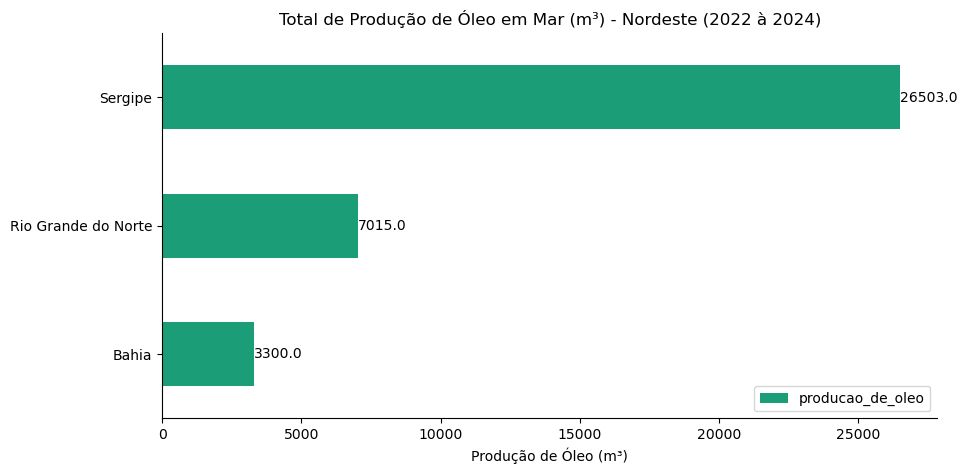

In [19]:
# Agrupando o dataframe df_ne pelo estado e calculando a soma
grupo_ne = df_ne.groupby('estado').sum()

# Plotando o gráfico de barras horizontal
ax = grupo_ne.plot(kind='barh', figsize=(10, 5), color=sns.palettes.mpl_palette('Dark2'))

# Removendo as bordas direita e superior do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionando rótulos aos dados
for i, v in enumerate(grupo_ne['producao_de_oleo']):
    ax.text(v, i, str(v), ha='left', va='center')

# Configurando o título do gráfico
plt.title('Total de Produção de Óleo em Mar (m³) - Nordeste (2022 à 2024)')

# Configurando o título do eixo horizontal (x)
plt.xlabel('Produção de Óleo (m³)')
ax.set_ylabel('')

# Exibindo o gráfico

plt.show()

In [37]:
#Avaliando estatística descritiva da produção mensal de óleo em cada estado:
df_ne.groupby('estado').describe()

producao_de_oleo                                        \
                               count        mean         std    min    25%   
estado                                                                       
Bahia                           15.0  220.000000   76.268323   97.0  162.5   
Rio Grande do Norte             29.0  241.896552  155.126986   17.0  146.0   
Sergipe                         29.0  913.896552  179.591072  659.0  790.0   

                                            
                       50%     75%     max  
estado                                      
Bahia                236.0   282.5   327.0  
Rio Grande do Norte  217.0   380.0   612.0  
Sergipe              868.0  1063.0  1241.0

In [24]:
# Avaliando apenas os meses em que houveram produção de óleo (Remoção de dados zerados).
df_ne = df_ne.query('producao_de_oleo != 0')

# Ajuste o dataframe para o formato adequado
formula = 'producao_de_oleo ~ estado'
lm = ols(formula, data=df_ne).fit()
anova_table = sm.stats.anova_lm(lm, typ=2)

# Execute a ANOVA e imprima a tabela de resultados
print("Tabela ANOVA:")
anova_table

Tabela ANOVA:


,sum_sq,df,F,PR(>F)
estado,8.074519e+06,2.0,170.41822,1.258977e-27
Residual,1.658321e+06,70.0,NaN,NaN


In [25]:
# Realizando o teste de Tukey
tukey_results = pairwise_tukeyhsd(df_ne['producao_de_oleo'], df_ne['estado'], alpha=0.05)

# Imprimindo os resultados

print("\nTukey Results:")
print(tukey_results)


Tukey Results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
              Bahia Rio Grande do Norte  21.8966 0.8958 -95.3211 139.1142  False
              Bahia             Sergipe 693.8966    0.0 576.6789 811.1142   True
Rio Grande do Norte             Sergipe    672.0    0.0 575.2107 768.7893   True
--------------------------------------------------------------------------------
